In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
"""
Two CSV files, 'netflix_fees.csv' and '2021_income.csv', are read into DataFrames 
named raw_netflix and raw_incomes, respectively.
raw_netflix.head() and raw_incomes.head() display the first few rows of each DataFrame.
"""


"\nTwo CSV files, 'netflix_fees.csv' and '2021_income.csv', are read into DataFrames \nnamed raw_netflix and raw_incomes, respectively.\nraw_netflix.head() and raw_incomes.head() display the first few rows of each DataFrame.\n"

In [4]:
raw_netflix = pd.read_csv('netflix_fees.csv')

In [5]:
raw_incomes = pd.read_csv('2021_income.csv')

In [6]:
raw_netflix.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99


In [7]:
raw_incomes.head()

,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321.0,31376.0,124590.0,647.599
1,United Arab Emirates,24292.0,27017.0,70089.0,9441.129
2,Norway,22684.0,25272.0,70005.0,5434.319
3,Switzerland,21490.0,25787.0,72376.0,8740.472
4,United States,19306.0,25332.0,65297.0,338289.857


In [8]:
"""
The DataFrames raw_netflix and raw_incomes are merged based on the 'country' column, and the result is stored in a new DataFrame called final_data.
final_data.head() displays the first few rows of the merged DataFrame.
"""

"\nThe DataFrames raw_netflix and raw_incomes are merged based on the 'country' column, and the result is stored in a new DataFrame called final_data.\nfinal_data.head() displays the first few rows of the merged DataFrame.\n"

In [9]:
final_data = raw_netflix.merge(raw_incomes, on='country' )

In [10]:
final_data.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26,5319.0,6935.0,0.0,45510.318
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39,17076.0,21329.0,53381.0,26177.413
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32,18405.0,20718.0,60418.0,8939.617
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32,16157.0,17917.0,56348.0,11655.930
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99,3631.0,4787.0,9110.0,12224.110


In [11]:
"""
percent_missing calculates the percentage of missing values in each column of the final_data 
DataFrame and stores the results.
The calculated percentages are then printed.
"""

'\npercent_missing calculates the percentage of missing values in each column of the final_data \nDataFrame and stores the results.\nThe calculated percentages are then printed.\n'

In [16]:
percent_missing = final_data.isnull().sum() * 100 / len(final_data)

In [17]:
percent_missing

country            0.0
code               0.0
library_size       0.0
tv_shows           0.0
movies             0.0
basic_usd          0.0
standard_usd       0.0
premium_usd        0.0
medianIncome       0.0
meanIncome         0.0
gdpPerCapitaPPP    0.0
pop2021            0.0
dtype: float64

In [18]:
"""
final_data.dropna() drops any rows containing missing values from the final_data DataFrame and updates final_data.
percent_missing is recalculated on the updated DataFrame, and the new percentages are printed.

"""

'\nfinal_data.dropna() drops any rows containing missing values from the final_data DataFrame and updates final_data.\npercent_missing is recalculated on the updated DataFrame, and the new percentages are printed.\n\n'

In [19]:
final_data = final_data.dropna()

In [22]:
percent_missing = final_data.isnull().sum() * 100 / len(final_data)

In [23]:
percent_missing

country            0.0
code               0.0
library_size       0.0
tv_shows           0.0
movies             0.0
basic_usd          0.0
standard_usd       0.0
premium_usd        0.0
medianIncome       0.0
meanIncome         0.0
gdpPerCapitaPPP    0.0
pop2021            0.0
dtype: float64

In [ ]:
"""
Two functions, cost_efficiency and is_affordable, are defined.

cost_efficiency calculates the cost efficiency by dividing the 'library_size' 
column by a specified plan column (e.g., 'basic_usd', 'standard_usd', 'premium_usd'), 
and stores the result in a new column specified by colname.

is_affordable calculates the affordability by dividing a specified plan column by the 
'medianIncome' column, and stores the result in a new column specified by colname.
"""

In [24]:
def cost_efficiency(plan, colname):
    final_data[colname] = final_data['library_size']/final_data[plan]
    return final_data

In [25]:
def is_affordable(plan, colname):
    final_data[colname] = final_data[plan]/final_data['medianIncome']
    return final_data

In [26]:
for i in ['basic_usd','standard_usd', 'premium_usd']:
    cost_colum_name = i + "_efficiency"
    income_column_name = i + "_affordable"
    final_data = cost_efficiency(i, cost_colum_name)
    final_data = is_affordable(i, income_column_name)

In [27]:
final_data.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,basic_usd_efficiency,basic_usd_affordable,standard_usd_efficiency,standard_usd_affordable,premium_usd_efficiency,premium_usd_affordable
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26,5319.0,6935.0,0.0,45510.318,1272.727273,0.000703,755.555556,0.001184,514.038877,0.001741
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39,17076.0,21329.0,53381.0,26177.413,779.846939,0.000459,504.455446,0.000710,373.032337,0.000960
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32,18405.0,20718.0,60418.0,8939.617,624.584718,0.000491,384.458078,0.000797,277.559055,0.001104
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32,16157.0,17917.0,56348.0,11655.930,491.141732,0.000629,327.427822,0.000943,245.570866,0.001258
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99,3631.0,4787.0,9110.0,12224.110,624.655820,0.002200,454.140127,0.003027,356.754825,0.003853


In [28]:
final_data.columns

Index(['country', 'code', 'library_size', 'tv_shows', 'movies', 'basic_usd',
       'standard_usd', 'premium_usd', 'medianIncome', 'meanIncome',
       'gdpPerCapitaPPP', 'pop2021', 'basic_usd_efficiency',
       'basic_usd_affordable', 'standard_usd_efficiency',
       'standard_usd_affordable', 'premium_usd_efficiency',
       'premium_usd_affordable'],
      dtype='object')

In [29]:
"""
top_libs is assigned the top 5 rows of final_data based 
on the 'library_size' column in descending order.

A bar plot is created using the 'country' column 
as the x-axis and the 'library_size' column as the y-axis, and it is displayed.

bottom_libs is assigned the bottom 5 rows of final_data based on the 'library_size' column in ascending order.
"""

"\ntop_libs is assigned the top 5 rows of final_data based \non the 'library_size' column in descending order.\n\nA bar plot is created using the 'country' column \nas the x-axis and the 'library_size' column as the y-axis, and it is displayed.\n\nbottom_libs is assigned the bottom 5 rows of final_data based on the 'library_size' column in ascending order.\n"

<Axes: xlabel='country'>

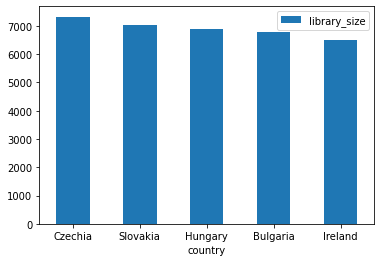

In [45]:
top_libs = final_data.sort_values('library_size', ascending=False).head(5)


top_libs.plot.bar(x='country', y='library_size', rot=0)

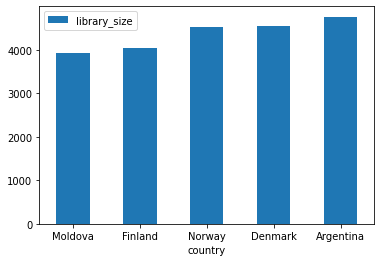

In [31]:
bottom_libs = final_data.sort_values('library_size', ascending=True).head(5)


bottom_libs.plot.bar(x='country', y='library_size', rot=0);

In [72]:
final_data['cost_per_titles'] = final_data['basic_usd']/final_data['library_size']

In [79]:
cost_per_title_top

,cost_per_titles,country
0,0.000786,Argentina
1,0.001282,Australia
2,0.001601,Austria
3,0.002036,Belgium
4,0.001601,Bolivia
5,0.000927,Brazil
6,0.001329,Bulgaria
7,0.001268,Canada
8,0.001416,Chile
9,0.000864,Colombia


In [73]:
cost_per_title_top = final_data[['cost_per_titles', 'country']]

<Axes: xlabel='country'>

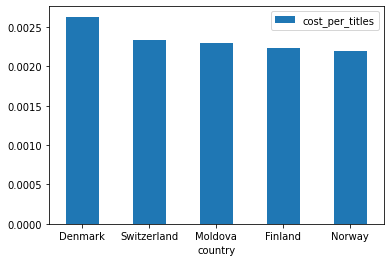

In [76]:
cost_per_title_top_5 = cost_per_title_top.sort_values('cost_per_titles', ascending=False).head(5)
cost_per_title_top_5.plot.bar(x='country', rot=0)

<Axes: xlabel='country'>

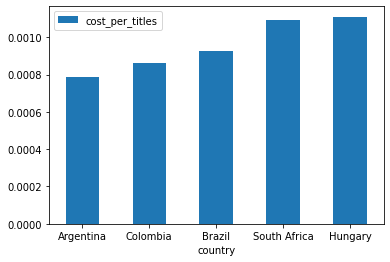

In [77]:
cost_per_title_bottom_5 = cost_per_title_top.sort_values('cost_per_titles', ascending=True).head(5)
cost_per_title_bottom_5.plot.bar(x='country', rot=0)

In [32]:
"""
df_affordable is created by selecting specific columns 
('country', 'basic_usd_affordable', 'standard_usd_affordable', 'premium_usd_affordable') 
from the final_data DataFrame.

affordable_top is assigned the top 5 rows of df_affordable based on the 'basic_usd_affordable' 
column in ascending order.

affordable_bottom is assigned the bottom 5 rows of df_affordable based on the 'basic_usd_affordable' 
column in descending order.

A bar plot is created using the 'country' column as the x-axis and displayed.
"""

"\ndf_affordable is created by selecting specific columns \n('country', 'basic_usd_affordable', 'standard_usd_affordable', 'premium_usd_affordable') \nfrom the final_data DataFrame.\n\naffordable_top is assigned the top 5 rows of df_affordable based on the 'basic_usd_affordable' \ncolumn in ascending order.\n\naffordable_bottom is assigned the bottom 5 rows of df_affordable based on the 'basic_usd_affordable' \ncolumn in descending order.\n\nA bar plot is created using the 'country' column as the x-axis and displayed.\n"

In [33]:
df_affordable = final_data[['country', 'basic_usd_affordable', 'standard_usd_affordable', 'premium_usd_affordable']]

In [34]:
affordable_top = df_affordable.sort_values('basic_usd_affordable', ascending=True).head(5)

<Axes: xlabel='country'>

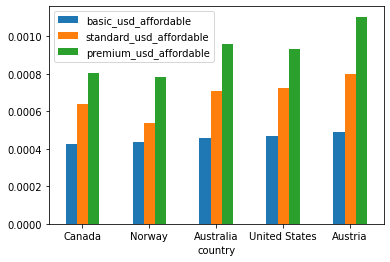

In [54]:
affordable_top.plot.bar(x='country', rot=0)



In [36]:
affordable_bottom = df_affordable.sort_values('basic_usd_affordable', ascending=False).head(5)

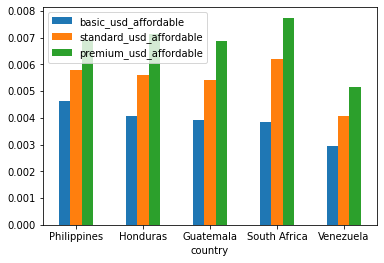

In [37]:
affordable_bottom.plot.bar(x='country', rot=0);

In [38]:
"""
final_data.columns prints the column names of final_data.

correlation_df is created by selecting specific columns from final_data.

corr is assigned the correlation matrix of the selected columns in df.
The correlation matrix is styled with a background gradient using the 'RdBu_r' colormap and displayed.

"""

"\nfinal_data.columns prints the column names of final_data.\n\ncorrelation_df is created by selecting specific columns from final_data.\n\ncorr is assigned the correlation matrix of the selected columns in df.\nThe correlation matrix is styled with a background gradient using the 'RdBu_r' colormap and displayed.\n\n"

In [39]:
correlation_df = final_data[['library_size', 'tv_shows', 'movies', 'basic_usd',
       'standard_usd', 'premium_usd', 'medianIncome', 'meanIncome',
       'gdpPerCapitaPPP', 'pop2021']]

In [43]:
corr = correlation_df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
library_size,1.000000,0.981227,0.773511,0.078790,0.064472,0.008504,0.123858,0.120179,0.268548,0.012780
tv_shows,0.981227,1.000000,0.636758,0.118097,0.109346,0.063965,0.175017,0.160788,0.334577,-0.057020
movies,0.773511,0.636758,1.000000,-0.073089,-0.101576,-0.176204,-0.079958,-0.047905,-0.025832,0.238475
basic_usd,0.078790,0.118097,-0.073089,1.000000,0.888765,0.797372,0.596545,0.572056,0.584914,-0.296845
standard_usd,0.064472,0.109346,-0.101576,0.888765,1.000000,0.973161,0.709499,0.702577,0.726468,-0.187850
premium_usd,0.008504,0.063965,-0.176204,0.797372,0.973161,1.000000,0.762585,0.754722,0.785254,-0.159332
medianIncome,0.123858,0.175017,-0.079958,0.596545,0.709499,0.762585,1.000000,0.993059,0.869755,-0.000044
meanIncome,0.120179,0.160788,-0.047905,0.572056,0.702577,0.754722,0.993059,1.000000,0.862824,0.063664
gdpPerCapitaPPP,0.268548,0.334577,-0.025832,0.584914,0.726468,0.785254,0.869755,0.862824,1.000000,-0.020437
pop2021,0.012780,-0.057020,0.238475,-0.296845,-0.187850,-0.159332,-0.000044,0.063664,-0.020437,1.000000


In [42]:
corr

,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
library_size,1.000000,0.981227,0.773511,0.078790,0.064472,0.008504,0.123858,0.120179,0.268548,0.012780
tv_shows,0.981227,1.000000,0.636758,0.118097,0.109346,0.063965,0.175017,0.160788,0.334577,-0.057020
movies,0.773511,0.636758,1.000000,-0.073089,-0.101576,-0.176204,-0.079958,-0.047905,-0.025832,0.238475
basic_usd,0.078790,0.118097,-0.073089,1.000000,0.888765,0.797372,0.596545,0.572056,0.584914,-0.296845
standard_usd,0.064472,0.109346,-0.101576,0.888765,1.000000,0.973161,0.709499,0.702577,0.726468,-0.187850
premium_usd,0.008504,0.063965,-0.176204,0.797372,0.973161,1.000000,0.762585,0.754722,0.785254,-0.159332
medianIncome,0.123858,0.175017,-0.079958,0.596545,0.709499,0.762585,1.000000,0.993059,0.869755,-0.000044
meanIncome,0.120179,0.160788,-0.047905,0.572056,0.702577,0.754722,0.993059,1.000000,0.862824,0.063664
gdpPerCapitaPPP,0.268548,0.334577,-0.025832,0.584914,0.726468,0.785254,0.869755,0.862824,1.000000,-0.020437
pop2021,0.012780,-0.057020,0.238475,-0.296845,-0.187850,-0.159332,-0.000044,0.063664,-0.020437,1.000000
